# Google Stock Market Predictions using LSTM and GRU Models with Python

## Importing necessary libraries

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN, GRU

# Data Collection

In [ ]:
ticker_symbol = "GOOG"

start_date = "2010-01-01"
end_date = "2023-08-30"

data = yf.download(ticker_symbol, start=start_date, end=end_date)

csv_filename = "google_stock_data.csv"
data.to_csv(csv_filename)
print(f"Data saved to {csv_filename}")

[*********************100%***********************]  1 of 1 completed

Data saved to google_stock_data.csv


# Data Exploration

## Loading the dataset

In [ ]:
df = pd.read_csv("google_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.571997,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.503424,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.112601,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.760787,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.957564,189680313


# Data Preparation

## Normalization

To make sure all the data in our stock market dataset is treated fairly, we'll change its numbers to be between 0 and 1. This way, no number will be too big or too small to influence the computer's learning. It's important for computer models that learn from data, because if some numbers are much bigger than others, they might get too much attention.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
# Extract numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Use the numerical features for scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(numerical_features)

## Crate Sequence

We'll break down the data into chunks of 15 consecutive data points. Each chunk will be used to predict the next data point. This will teach our model to recognize patterns and relationships within the data and make better predictions for future values.

In [ ]:
import numpy as np
def create_sequences(data, window_size):
  X, y = [], []
  for i in range(len(data) - window_size):
    X.append(data[i:(i + window_size), :])
    y.append(data[i + window_size, 0])
  return np.array(X), np.array(y)

window_size = 15
X, y = create_sequences(scaled_data, window_size)

X = X.reshape((X.shape[0], X.shape[1], numerical_features.shape[1]))

# Modeling

## Split the data into training and testing sets

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## GRU Model

In [ ]:
gru_model = Sequential()

# First GRU layer with dropout
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dropout(0.2))

# Second GRU layer with dropout
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer with dropout
gru_model.add(GRU(units=50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fourth GRU layer with dropout
gru_model.add(GRU(units=50))
gru_model.add(Dropout(0.2))

# output layer
gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')

gru_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 15, 50)              │           8,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 15, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 15, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,651 (213.48 KB)

 Trainable params: 54,651 (213.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gru_model.fit(X_train, y_train, epochs=35, batch_size=32)

Epoch 1/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0044
Epoch 2/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 8.5590e-04
Epoch 3/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 7.6544e-04
Epoch 4/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 6.2173e-04
Epoch 5/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 5.3835e-04
Epoch 6/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 6.1450e-04
Epoch 7/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 4.6496e-04
Epoch 8/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.4675e-04
Epoch 9/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 4.7332e-04
Epoch 10/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 4.2886e-04
Epoch 11/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.7900e-04
Epoch 12/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.3628e-04
Epoch 13/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 5.2402e-04
Epoch 14/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 3.8809e-04
Epoch 15/35
86/86 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


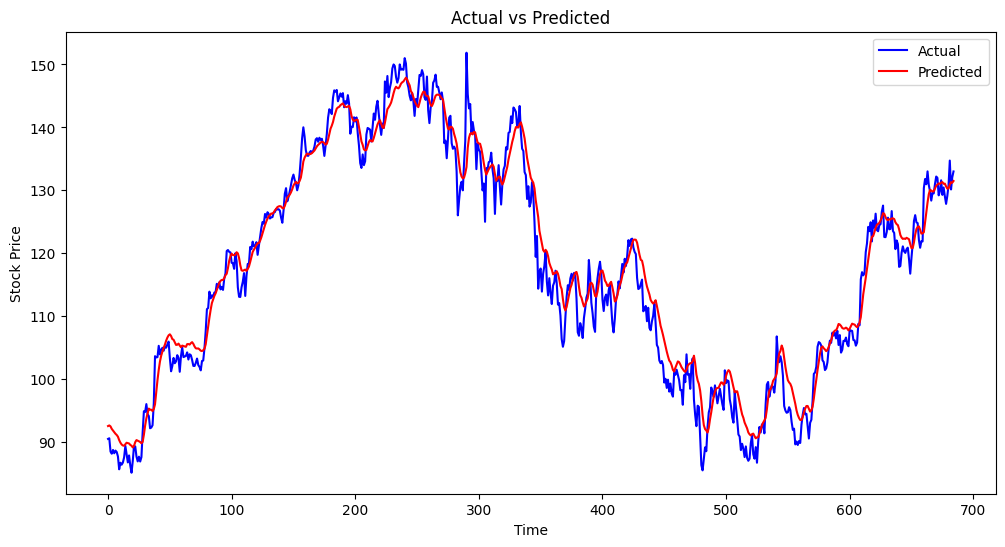

In [ ]:
predicted_gru = gru_model.predict(X_test)

# Inverse transform the predicted and actual values
temp_array = np.zeros((predicted_gru.shape[0], 6))
temp_array[:,0] = predicted_gru[:,0]

predicted_gru = scaler.inverse_transform(temp_array)[:,0]

# Inverse transform the actual values
temp_array = np.zeros((y_test.shape[0], 6))
temp_array[:,0] = y_test

y_test_actual = scaler.inverse_transform(temp_array)[:,0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predicted_gru, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# LSTM Model

In [ ]:
lstm_model = Sequential()

# First LSTM layer with dropout
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.2))

# Second LSTM layer with dropout
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

# Third LSTM layer with dropout
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

# Fourth LSTM layer with dropout
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))

# Output layer
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 15, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 15, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 15, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,051 (281.45 KB)

 Trainable params: 72,051 (281.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model.fit(X_train, y_train, epochs=35, batch_size=32)

Epoch 1/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.2016e-04
Epoch 2/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 3.1823e-04
Epoch 3/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.9969e-04
Epoch 4/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.9682e-04
Epoch 5/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 3.4059e-04
Epoch 6/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.1868e-04
Epoch 7/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 2.6793e-04
Epoch 8/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 3.0093e-04
Epoch 9/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.4229e-04
Epoch 10/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.9298e-04
Epoch 11/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 3.1059e-04
Epoch 12/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 3.0277e-04
Epoch 13/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 2.9072e-04
Epoch 14/35
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.6300e-04
Epoch 15/35
86/

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


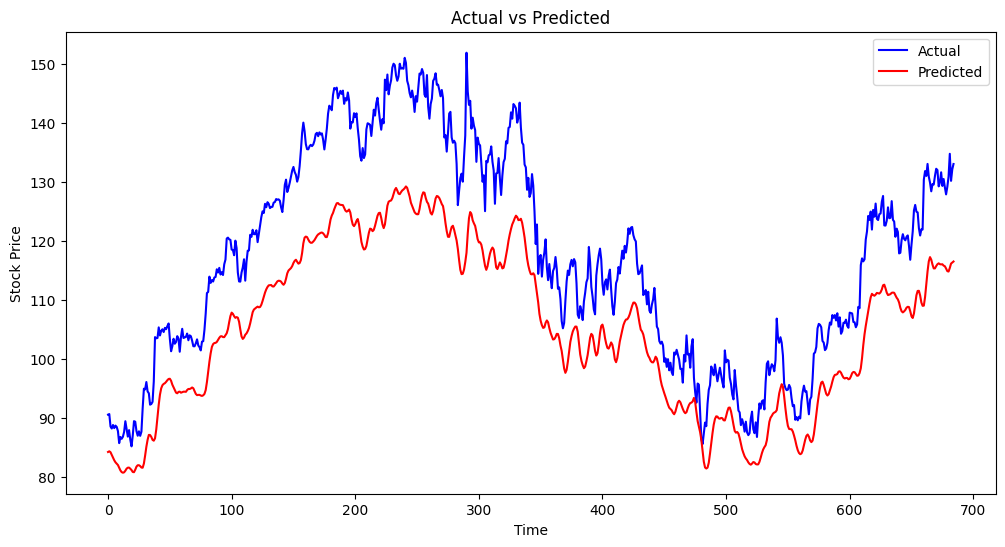

In [ ]:
# Make predictions
predicted_lstm = lstm_model.predict(X_test)

# Inverse transform the predicted and actual values
temp_array = np.zeros((predicted_lstm.shape[0], 6))
temp_array[:,0] = predicted_lstm[:,0]
predicted_lstm = scaler.inverse_transform(temp_array)[:,0]

# Inverse tranform y_test actual
temp_array = np.zeros((y_test.shape[0], 6))
temp_array[:,0] = y_test
y_test_actual = scaler.inverse_transform(temp_array)[:,0]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual', color='blue')
plt.plot(predicted_lstm, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Testing GRU and LSTM on new Google stock price

comparing the performance of both model ( GRU and LSTM ) on new Google stock price dataset with one year historical data.

Downloading a fresh dataset containing Google's stock price from the past year, normalize the data, create sequences with the same training parameters using a window size of 15, and then evaluate and plotting on both GRU and LSTM model.

In [ ]:
# Assuming you have new data for Google stock (new_goog_data) in a DataFrame
new_goog_data = yf.download("GOOG", start="2023-08-31", end="2024-08-31")
new_goog_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-31,137.050003,138.399994,136.820007,137.350006,137.013519,28147900
2023-09-01,138.429993,138.580002,135.940002,136.800003,136.464859,16665700
2023-09-05,136.440002,137.369995,135.559998,136.710007,136.375092,17730200
2023-09-06,137.014999,137.479996,134.690002,135.369995,135.038361,15814300
2023-09-07,134.600006,136.580002,133.960007,136.199997,135.866333,16976000
...,...,...,...,...,...,...
2024-08-26,168.154999,169.380005,166.320007,167.929993,167.709229,11990300
2024-08-27,167.610001,168.244995,166.160004,166.380005,166.161270,13718200
2024-08-28,166.779999,167.389999,163.279999,164.500000,164.283737,15208700


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


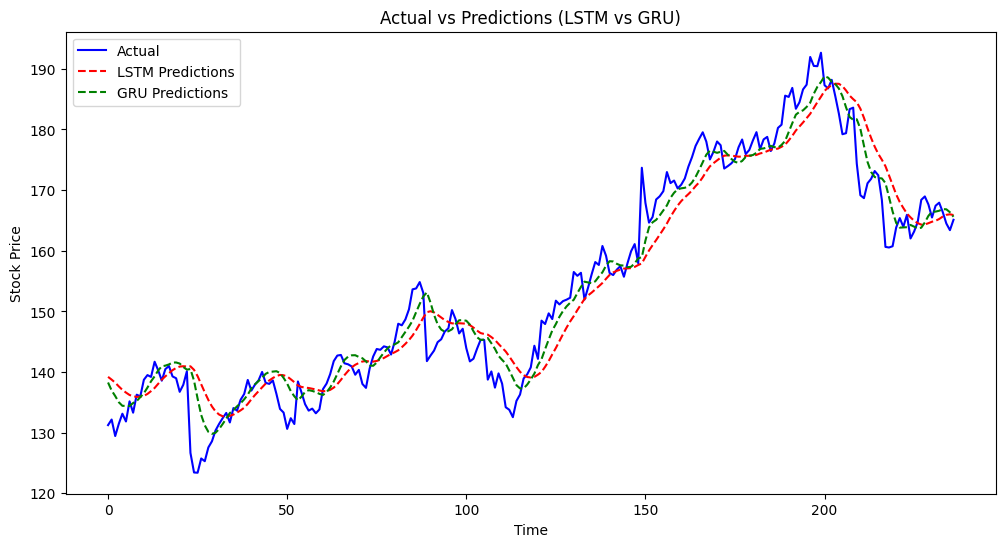

In [ ]:
# Select the 'Close' column as before
new_data = new_goog_data['Close'].values.reshape(-1, 1)

# Scale the data using the same scaler that was fit on the original training data
scaled_new_data = scaler.transform(new_data)

# Create sequences for the new data
window_size = 15
# Create sequences from the new scaled data using the updated window size
X_new, y_new = create_sequences(scaled_new_data, window_size)

# Reshape to match the model's expected input shape
# (This will now work as X_new has at least 2 dimensions)
X_new = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)

# Make predictions using the trained models
predicted_gru_new = gru_model.predict(X_new)
predicted_lstm_new = lstm_model.predict(X_new)

# Inverse transform the predictions back to the original scale
lstm_predictions_new = scaler.inverse_transform(predicted_lstm_new)[:, 0]
gru_predictions_new = scaler.inverse_transform(predicted_gru_new)[:, 0]

# Inverse transform the actual values - These are the target values from the create_sequences function
y_actual = scaler.inverse_transform(y)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual', color='blue')
plt.plot(lstm_predictions_new, label='LSTM Predictions', color='red', linestyle='--')
plt.plot(gru_predictions_new, label='GRU Predictions', color='green', linestyle='--')
plt.title('Actual vs Predictions (LSTM vs GRU)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()